In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [10]:
with h5py.File("samples.h5",'r') as hf:
    mu2 = np.array(hf['mu2'])
    sigma2 = np.array(hf['sigma2'])
hf.close()

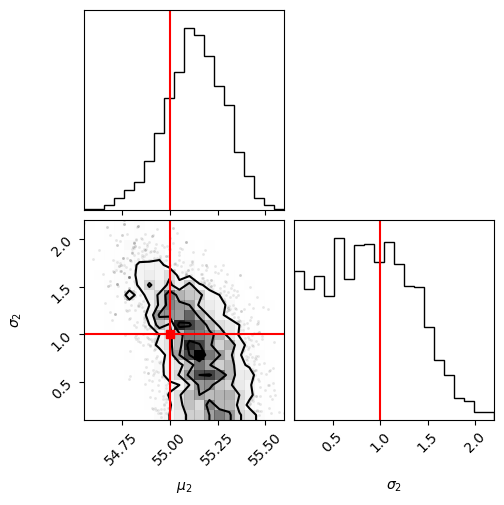

In [12]:
import corner
figure = corner.corner(np.array([mu2,sigma2]).T, labels=[r'$\mu_2$', r'$\sigma_2$'])
true = np.array([55.0,1.0])
# Extract the axes
axes = np.array(figure.axes).reshape((len(true), len(true)))

# Loop over the diagonal
for i in range(len(true)):
    ax = axes[i, i]
    ax.axvline(true[i], color="r")



# Loop over the histograms
for yi in range(len(true)):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true[xi], color="r")
        ax.axhline(true[yi], color="r")
        ax.plot(true[xi], true[yi], "sr")

# Unbiased.